<a href="https://colab.research.google.com/github/qjpbpios/CPE-031-Visualization-and-Data-Analysis/blob/main/Hands_On_Activity_9___Exploring_Data_Visually_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Pios, Joshua Paul B. <br>
Course Code and Title : CPE 031; Visualizations and Data Analysis <br>
Date Submitted : 10/16/2025<br>
Instructor : Engr. Rizette Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


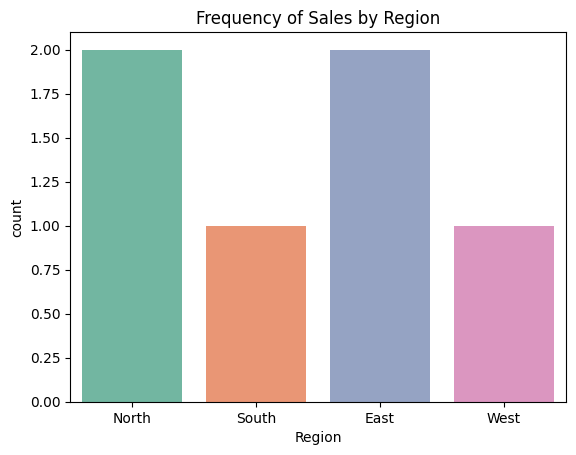

In [ ]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


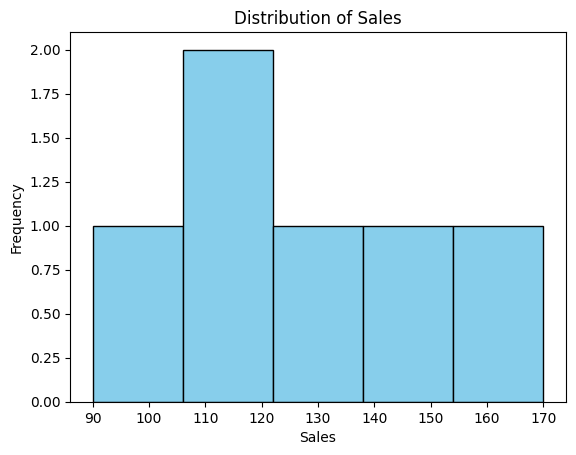

In [ ]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

/tmp/ipython-input-975988617.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="pastel")


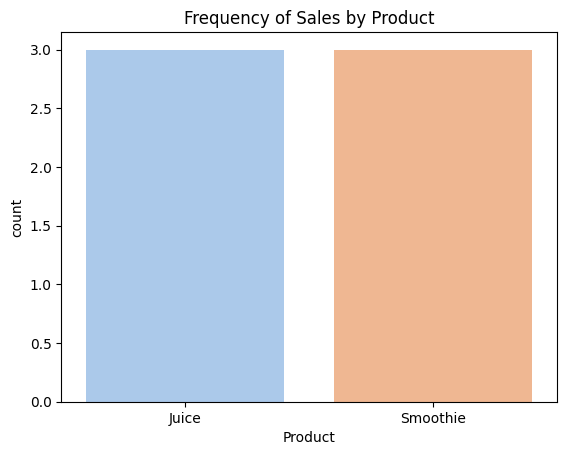

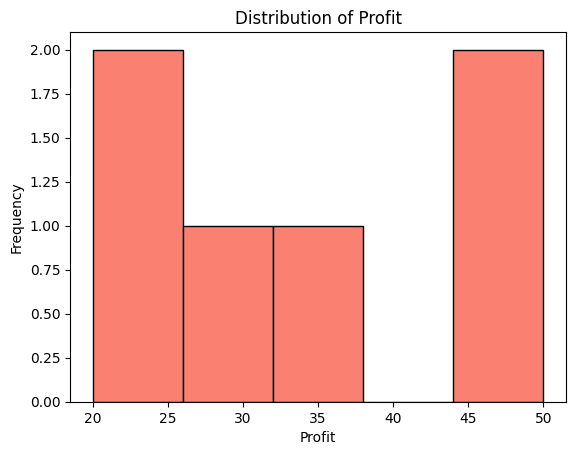

In [ ]:
sns.countplot(x="Product", data=df, palette="pastel")
plt.title("Frequency of Sales by Product")
plt.show()

plt.hist(df["Profit"], bins=5, color="salmon", edgecolor="black")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

Section 2: Relationships Between Variables

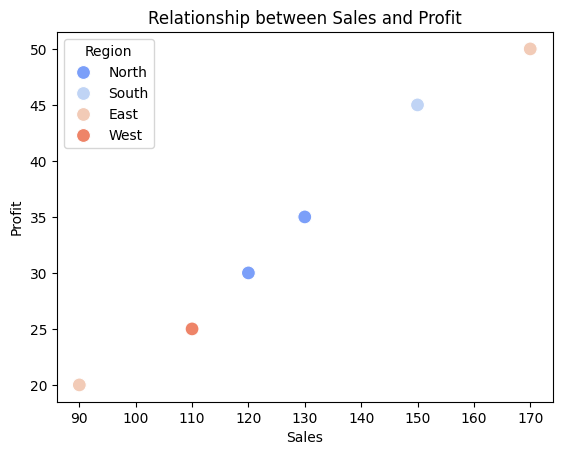

In [ ]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [ ]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

Looking at the dots on the first graph, it seems like when the sales go up, the profit usually goes up too. Morevover, for the best region, I checked the table and the East region sold the most smoothies on average, so East is doing the best.

Section 3: Analysis of Missing Data

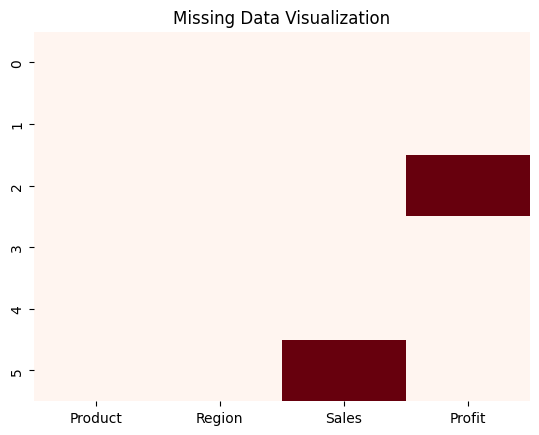

,0
Product,0
Region,0
Sales,1
Profit,1


In [ ]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

In the data illustration, red lines can be seen. These red lines show where the data is missing. The variables that have missing data are "Sales" and "Profit". This means that these variables need attention before doing any more analysis.

Section 4: Visualizing Time-Series Data

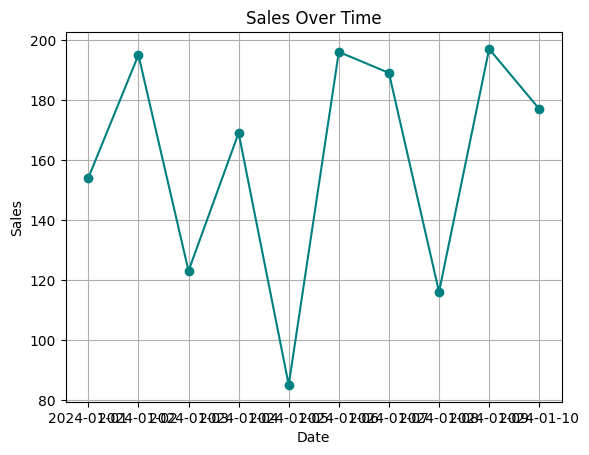

In [ ]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

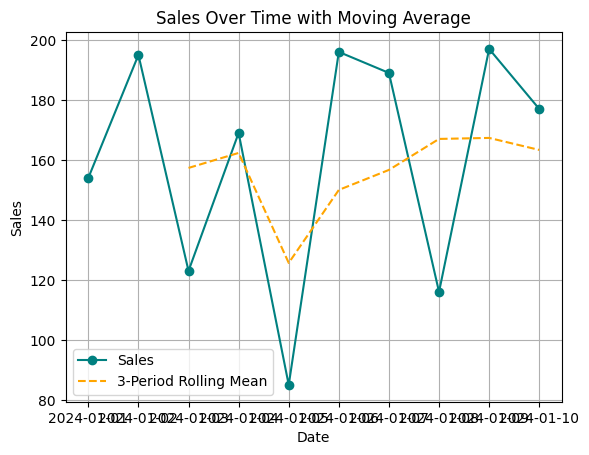

In [ ]:
ts_df["Sales_RollingMean"] = ts_df["Sales"].rolling(window=3).mean()

plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Sales")
plt.plot(ts_df["Date"], ts_df["Sales_RollingMean"], color="orange", linestyle="--", label="3-Period Rolling Mean")
plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

Section 5: Visualizing Geospatial Data

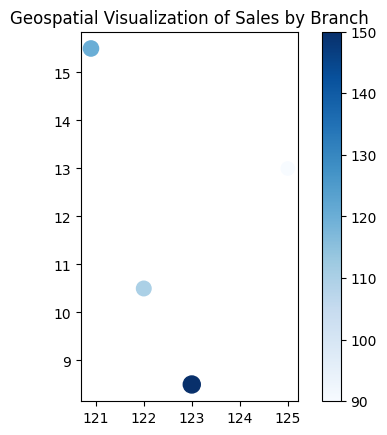

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

Looking at the map, the big blue dots show where we sell the most stuff, and it looks like the South branch sells the most because its dot is the biggest. This kind of map helps us see which places are doing really well so we know where people are buying more, and it can help us decide where to open new stores or put more effort into selling things in different areas.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

In [ ]:
import pandas as pd

df_fashion = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fashion(Data Points) - Form responses 1.csv")
df_fashion.head()

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


/tmp/ipython-input-4083291214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_variable, data=df_fashion, palette='viridis')


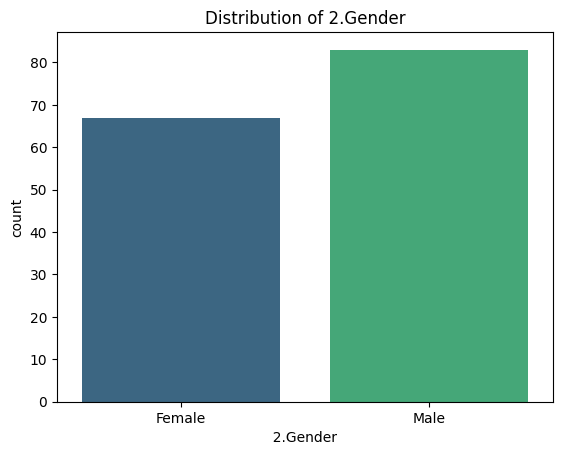

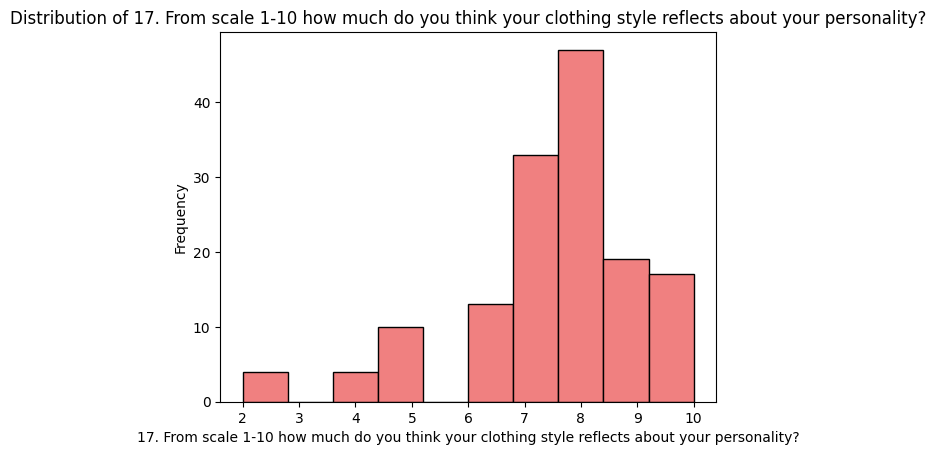

In [ ]:
categorical_variable = '  2.Gender  '
sns.countplot(x=categorical_variable, data=df_fashion, palette='viridis')
plt.title(f'Distribution of {categorical_variable.strip()}')
plt.show()

quantitative_variable = '17. From scale 1-10 how much do you think your clothing style reflects about your personality?'
plt.hist(df_fashion[quantitative_variable], bins=10, color='lightcoral', edgecolor='black')
plt.title(f'Distribution of {quantitative_variable}')
plt.xlabel(quantitative_variable)
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-389977824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='  2.Gender  ', y='17. From scale 1-10 how much do you think your clothing style reflects about your personality?', data=df_fashion, palette='plasma')


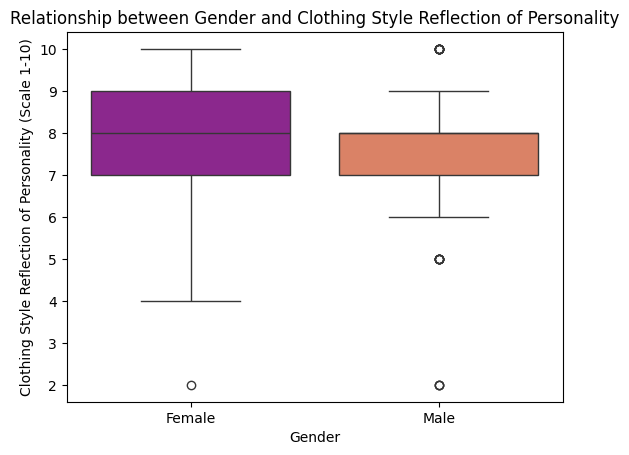

In [ ]:
sns.boxplot(x='  2.Gender  ', y='17. From scale 1-10 how much do you think your clothing style reflects about your personality?', data=df_fashion, palette='plasma')
plt.title('Relationship between Gender and Clothing Style Reflection of Personality')
plt.xlabel('Gender')
plt.ylabel('Clothing Style Reflection of Personality (Scale 1-10)')
plt.show()

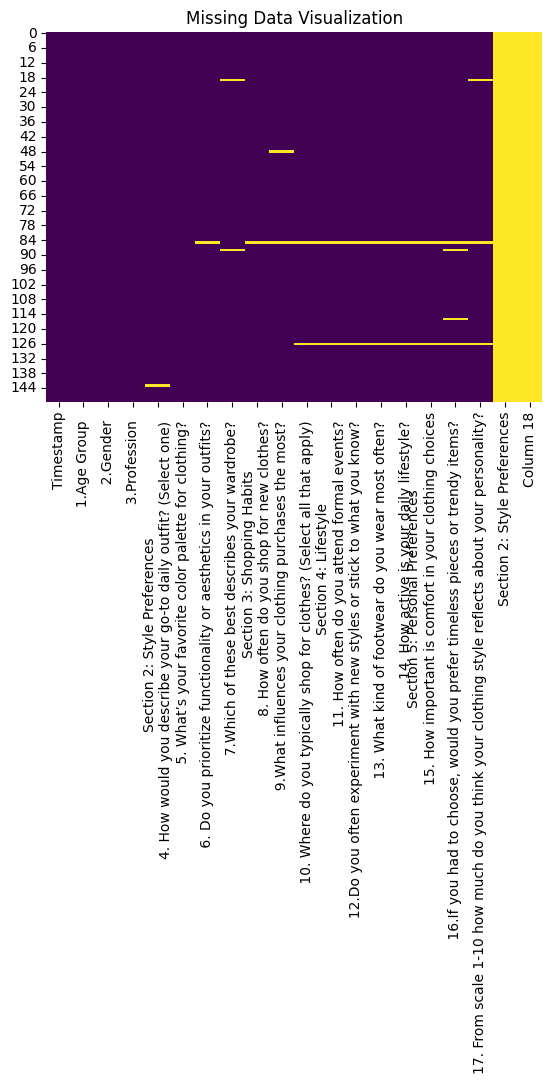

Timestamp                                                                                            0
  1.Age Group                                                                                        0
  2.Gender                                                                                           0
  3.Profession                                                                                       0
Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)        1
 5. What’s your favorite color palette for clothing?                                                 0
 6. Do you prioritize functionality or aesthetics in your outfits?                                   1
  7.Which of these best describes your wardrobe?                                                     2
Section 3: Shopping Habits\n8. How often do you shop for new clothes?                                1
  9.What influences your clothing purchases the most?                    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df_fashion.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Visualization")
plt.show()

print(df_fashion.isnull().sum())

Index(['Timestamp', '  1.Age Group  ', '  2.Gender  ', '  3.Profession  ',
       'Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)  ',
       ' 5. What’s your favorite color palette for clothing?  ',
       ' 6. Do you prioritize functionality or aesthetics in your outfits?  ',
       '  7.Which of these best describes your wardrobe?  ',
       'Section 3: Shopping Habits\n8. How often do you shop for new clothes?  ',
       '  9.What influences your clothing purchases the most?  ',
       ' 10. Where do you typically shop for clothes? (Select all that apply)  ',
       'Section 4: Lifestyle\n11. How often do you attend formal events?  ',
       '  12.Do you often experiment with new styles or stick to what you know?  ',
       ' 13. What kind of footwear do you wear most often?  ',
       '14. How active is your daily lifestyle?  ',
       'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n',
       ' 

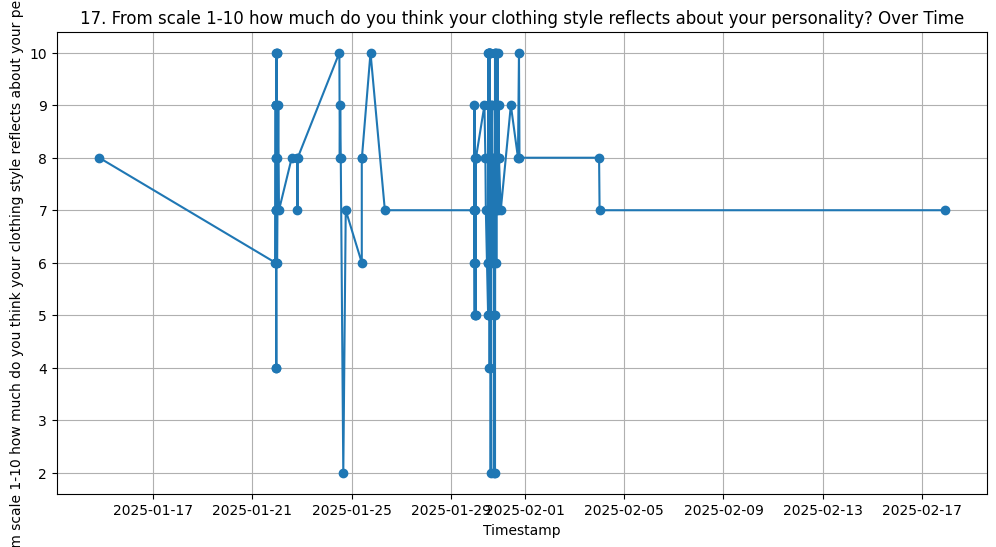

In [ ]:
print(df_fashion.columns)

df_fashion['Timestamp'] = pd.to_datetime(df_fashion['Timestamp'], format='%d/%m/%Y %H:%M:%S')

df_fashion = df_fashion.sort_values('Timestamp')

quantitative_variable = '17. From scale 1-10 how much do you think your clothing style reflects about your personality?'

plt.figure(figsize=(12, 6))
plt.plot(df_fashion['Timestamp'], df_fashion[quantitative_variable], marker='o', linestyle='-')
plt.title(f'{quantitative_variable} Over Time')
plt.xlabel('Timestamp')
plt.ylabel(quantitative_variable)
plt.grid(True)
plt.show()

**Univariate Analysis**: Looking at the charts for individual things, I made a bar chart to see how many guys and girls answered the survey. It seems like there were more guys than girls in this dataset. I also made a chart that shows how many people felt their clothes reflect their personality on a scale of 1 to 10. Most people thought their clothes reflected their personality somewhere in the middle of the scale, like around a 6 to 8.

**Bivariate Analysis**: To see if there was a connection between gender and how much people thought their clothes showed their personality, I made a box plot. The box plot showed that both guys and girls had a similar range of scores, with the middle line (which is like the average) being pretty close for both groups. This means that based on this data, being a guy or a girl doesn't seem to make a big difference in how much you feel your clothing style reflects who you are.

**Missing Data Visualization**: When I looked at the chart that shows where data is missing, I saw a lot of colored lines, especially in some columns towards the end. This means there are many empty spots in those parts of the survey. Two columns, in particular, had a huge number of missing answers, and another one about choosing between old and new styles also had some missing. Before I do more analysis, I'll need to decide what to do about these missing parts, like maybe filling them in or just not using those columns.

**Time-Series Visualization**: I also looked at how the scores for "how much your clothing style reflects your personality" changed over time since the survey started. I made a line graph with the date on the bottom and the score on the side. The line wiggles up and down, showing that the scores changed a bit over the days people took the survey. There isn't a clear big trend up or down, but you can see some variation in how people felt about this question over time.

**Key Insights**: From all the charts and looking at the data, I learned a few things. There were more male participants than female in this dataset. Gender didn't seem to have a strong relationship with how much people felt their clothing style reflected their personality. A significant amount of data is missing in certain columns, which is important to address before further analysis. Finally, the scores for how much clothing style reflects personality varied over time, although there wasn't a clear upward or downward trend.


**6. Conclusion/Learnings/Analysis:**

**6. Conclusion/Learnings/Analysis:**

Through this supplementary activity, I learned how to apply different data visualization techniques to a new dataset. I practiced performing univariate analysis by creating countplots and histograms to understand the distribution of single variables like gender and how much people feel their clothing reflects their personality. I also explored the relationship between gender and personality reflection using a box plot as part of bivariate analysis, which showed that gender didn't seem to be a major factor in this dataset. Visualizing missing data with a heatmap was helpful in identifying columns with significant missing values, highlighting the importance of data cleaning before analysis. Finally, creating a time-series plot allowed me to observe how a quantitative variable changed over time, even without a strong trend. This activity reinforced the importance of visual exploration in understanding data patterns, identifying issues like missing data, and gaining initial insights before conducting more formal analysis. It also showed me the practical steps involved in loading, cleaning (by noting the column name issue), and visualizing data using Python libraries like pandas, matplotlib, and seaborn.